# EDA YELP


In [31]:
import json
import os
import pandas as pd
import pickle
import pyarrow.parquet as pq
import re
import matplotlib.pyplot as plt
import seaborn as sns
import folium 

# Yelp - Archivo check in

En este archivo podemos ver las reservas, segun el business id y las fechas

In [2]:
df= pd.read_json(r'C:\Users\flori\Desktop\LOCAL\YELP\Yelp\checkin.json', lines=True)

In [14]:
df.head(10)

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."
5,--8IbOsAAxjKRoYsBFL-PA,"2015-06-06 01:03:19, 2015-07-29 16:50:58, 2015..."
6,--9osgUCSDUWUkoTLdvYhQ,"2015-06-13 02:00:57, 2015-07-04 00:44:09, 2015..."
7,--ARBQr1WMsTWiwOKOj-FQ,"2014-12-12 00:44:23, 2015-01-09 00:19:52, 2015..."
8,--FWWsIwxRwuw9vIMImcQg,"2010-09-11 16:28:39, 2010-12-22 21:14:19, 2011..."
9,--FcbSxK1AoEtEAxOgBaCw,"2017-08-18 19:43:50, 2017-10-07 22:38:38, 2017..."


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  131930 non-null  object
 1   date         131930 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


Transformamos los datos a DATETIME y separamos la columna que tiene varios valores en una misma columna

In [19]:
# Dividir las fechas por la coma
df['date'] = df['date'].str.split(', ')

# Utilizar la función explode para separar las fechas en filas individuales
df = df.explode('date')

# Convertir la columna "fechas" a tipo datetime
df['date'] = pd.to_datetime(df['date'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13356875 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Dtype         
---  ------       -----         
 0   business_id  object        
 1   date         datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 305.7+ MB


In [21]:
df.head()

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,2020-03-13 21:10:56
0,---kPU91CF4Lq2-WlRu9Lw,2020-06-02 22:18:06
0,---kPU91CF4Lq2-WlRu9Lw,2020-07-24 22:42:27
0,---kPU91CF4Lq2-WlRu9Lw,2020-10-24 21:36:13
0,---kPU91CF4Lq2-WlRu9Lw,2020-12-09 21:23:33


Ahora hago nuevas columnas con año y dia para realizar sus respectivos graficos

In [23]:
df['dia_semana'] = df['date'].dt.day_name()

In [26]:
df['año'] = df['date'].dt.year

In [28]:
año= df[['año','business_id']].groupby('año').count()


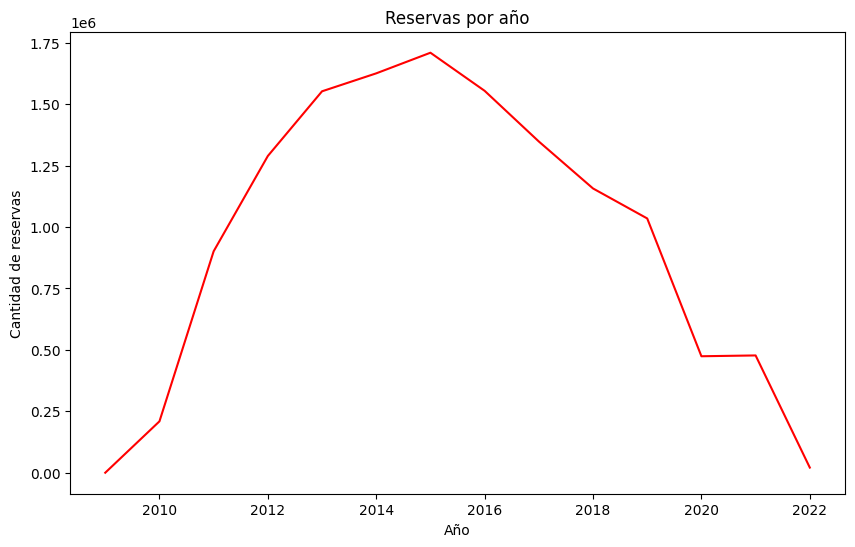

In [29]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=año, x='año', y= 'business_id', color='red')
plt.xlabel('Año')
plt.ylabel('Cantidad de reservas')
plt.title('Reservas por año')
plt.show()

In [30]:
dia= df[['dia_semana','business_id']].groupby('dia_semana').count()
dia_sorted= dia.sort_values(ascending=False, by='business_id')
dia_sorted7=dia_sorted.head(7)

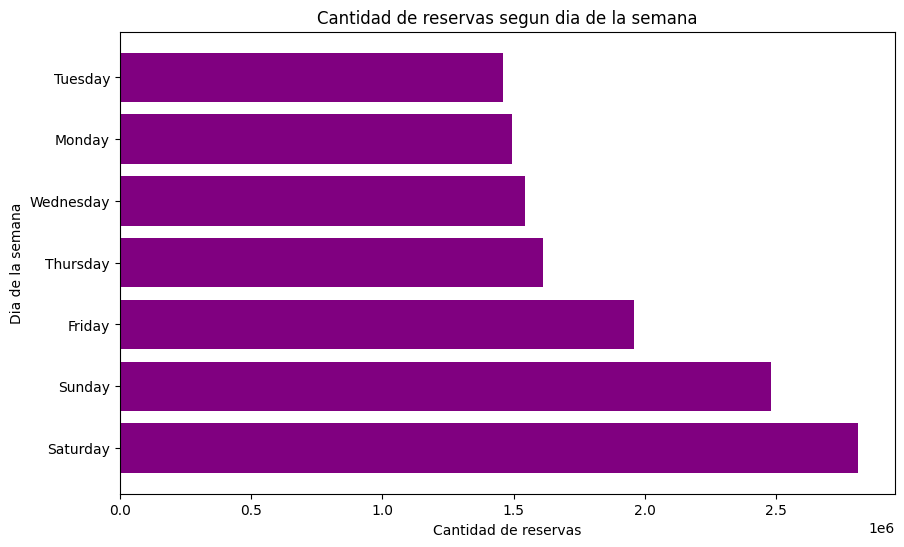

In [33]:
#Grafico el top 10 de categorias mas comentadas
plt.figure(figsize=(10, 6))
plt.barh(dia_sorted7.index, dia_sorted7['business_id'], color='purple')
plt.xlabel('Cantidad de reservas')
plt.ylabel('Dia de la semana')
plt.title('Cantidad de reservas segun dia de la semana')
plt.show()

Como era de esperar la mayor cantidad de reservas es durante el fin de semana, primero sabado, luego domingo y luevo viernes

# Yelp - Archivo reviews

In [3]:
### dsp con REVIEW
ruta_relativa2= 'C:/Users/flori/Desktop/LOCAL/YELP/review-001.json'


ruta_absoluta2 = os.path.abspath(ruta_relativa2)

In [4]:
import pandas as pd
import json

ruta_absoluta2 = ruta_relativa2  # Replace with the actual file path

data_list = []  # List to store data from the JSON file

# Specify the correct encoding when opening the file
with open(ruta_absoluta2, 'r', encoding='utf-8') as archivo:
    for linea in archivo:
        try:
            datos = json.loads(linea)
            data_list.append(datos)  # Append the JSON data to the list
        except json.JSONDecodeError as e:
            print(f"JSON decoding error: {e}")

# Create a DataFrame from the list of JSON data
df2 = pd.DataFrame(data_list)

# Now, df2 contains the data from your JSON file in a DataFrame.


In [5]:
df2.head(10)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
5,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31
6,6AxgBCNX_PNTOxmbRSwcKQ,r3zeYsv1XFBRA4dJpL78cw,gmjsEdUsKpj9Xxu6pdjH0g,5.0,0,2,0,Loved this tour! I grabbed a groupon and the p...,2015-01-03 23:21:18
7,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5.0,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16
8,ZKvDG2sBvHVdF5oBNUOpAQ,wSTuiTk-sKNdcFyprzZAjg,B5XSoSG3SfvQGtKEGQ1tSQ,3.0,1,1,0,This easter instead of going to Lopez Lake we ...,2016-03-30 22:46:33
9,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3.0,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06


In [6]:
# Vista de cantidad de datos en el df
df2.shape
print('El archivo reviews de yelp tiene las siguientes filas y columnas', df2.shape)

El archivo reviews de yelp tiene las siguientes filas y columnas (6990280, 9)


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   review_id    object 
 1   user_id      object 
 2   business_id  object 
 3   stars        float64
 4   useful       int64  
 5   funny        int64  
 6   cool         int64  
 7   text         object 
 8   date         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 480.0+ MB


In [8]:
# No hay nulos
df2.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

In [14]:
# de todos los datos hay casi 2m de usuarios, es decir que al menos cada usuario emitio 3 reviews aprox
df2.user_id.nunique()

1987929

In [19]:
# Valores unicos por business. 150346 businesses unicos
df2.business_id.nunique()

150346

In [ ]:
# El maximo de reviews para un lugar es de 7673 y el minimo 5 reviews
review_counts = df2.groupby('business_id')['review_id'].count().reset_index()
review_counts.sort_values(by = "review_id")

,business_id,review_id
80419,XHG8JXyUm4MgmrZ4BhqNdw,5
134824,tUpS1ztCfz7Q13-ZL-lCIQ,5
17736,6SFjEtUtLqZwd8bsMW71lQ,5
134826,tUr7rlfUGwrFVEiNulJXrQ,5
134827,tUrh1N3cIQmBf3TyVQ91mg,5
...,...,...
122423,oBNrLz4EDhiscSlbOl8uAw,5264
147782,ytynqOUb3hjKeJfRj5Tshw,5778
41309,GXFMD0Z4jEVZBCsbPf4CTQ,6160
90484,ac1AeYqs8Z4_e2X5M3if2A,7516


In [24]:
# Podriamos hacer un filtro que por ejemplo, para que la review sea valida tenga una cantidad mayor a x reviews y asi reducimos el df
review_counts[review_counts["review_id"]<20]

,business_id,review_id
1,--0iUa4sNDFiZFrAdIWhZQ,14
2,--30_8IhuyMHbSOcNWd6DQ,9
3,--7PUidqRWpRSpXebiyxTg,12
4,--7jw19RH9JKXgFohspgQw,13
8,--FWWsIwxRwuw9vIMImcQg,8
...,...,...
150341,zznZqH9CiAznbkV6fXyHWA,12
150342,zztOG2cKm87I6Iw_tleZsQ,6
150343,zzu6_r3DxBJuXcjnOYVdTw,8
150344,zzw66H6hVjXQEt0Js3Mo4A,5


In [9]:
# Conteo de la distribucion de estrellas otorgadas a los businesses

df2.stars.value_counts()

stars
5.0    3231627
4.0    1452918
1.0    1069561
3.0     691934
2.0     544240
Name: count, dtype: int64

In [10]:
stars= df2[['stars','review_id']].groupby('stars').count()
stars_sorted= stars.sort_values(ascending=False, by='review_id')


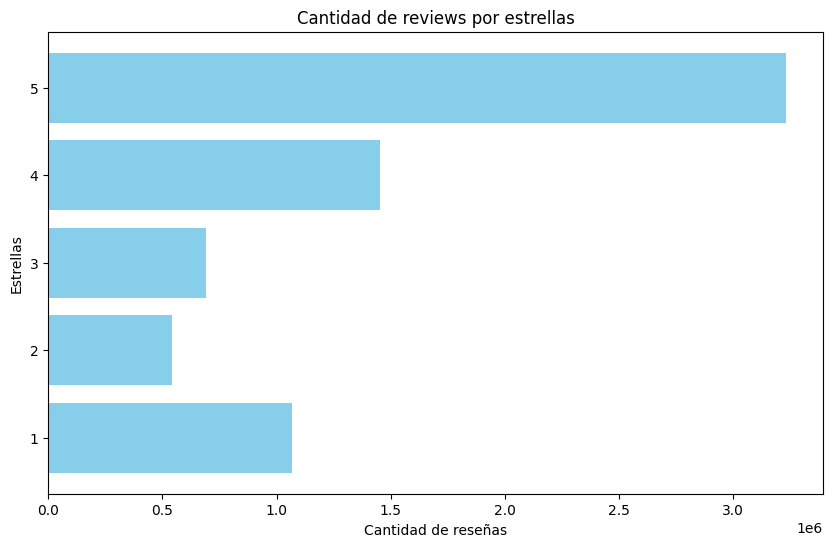

In [13]:
#Grafico el top 10 de categorias mas comentadas
plt.figure(figsize=(10, 6))
plt.barh(stars_sorted.index, stars_sorted['review_id'], color='skyblue')
plt.xlabel('Cantidad de reseñas')
plt.ylabel('Estrellas')
plt.title('Cantidad de reviews por estrellas')
plt.show()

In [26]:
# Ver como se distribuyen las clasificaciones de los reviews.
df2.pivot_table(index='business_id', columns='stars', values='review_id', aggfunc='count', fill_value=0)



stars,1.0,2.0,3.0,4.0,5.0
business_id,,,,,
---kPU91CF4Lq2-WlRu9Lw,1,0,2,4,17
--0iUa4sNDFiZFrAdIWhZQ,3,0,4,5,2
--30_8IhuyMHbSOcNWd6DQ,3,0,0,1,5
--7PUidqRWpRSpXebiyxTg,7,2,2,1,0
--7jw19RH9JKXgFohspgQw,2,0,1,0,10
...,...,...,...,...,...
zznZqH9CiAznbkV6fXyHWA,0,0,0,1,11
zztOG2cKm87I6Iw_tleZsQ,0,0,0,1,5
zzu6_r3DxBJuXcjnOYVdTw,0,1,2,4,1


In [27]:
df2.date.max()

'2022-01-19 19:48:45'

In [28]:
df2.date.min()

# Tenemos 17 años de review considerando los rangos de fecha

'2005-02-16 03:23:22'

# Yelp - Archivo businesses

In [3]:
ruta_relativa3 = "C:/Users/flori/Desktop/LOCAL/YELP/Yelp/business.pkl"
# Obtener la ruta absoluta al archivo .pkl
ruta_absoluta3 = os.path.abspath(ruta_relativa3)



In [4]:
df_businesses = pd.read_pickle(ruta_relativa3)

In [5]:

df_businesses.shape

(150346, 28)

In [6]:
df_businesses.head(10)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,AZ,37015,36.269593,-87.058943,2.0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,PA,63144,38.627695,-90.340465,2.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,qkRM_2X51Yqxk3btlwAQIg,Temple Beth-El,400 Pasadena Ave S,St. Petersburg,PA,33707,27.76659,-82.732983,3.5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,TN,63123,38.565165,-90.321087,3.0,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,MO,37207,36.208102,-86.76817,1.5,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_businesses.columns
# estan duplicadas las columnas, tienen 14, o sera normal est caso, me llamo la atencion

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'business_id', 'name', 'address',
       'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars',
       'review_count', 'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')

In [8]:
# Drop duplicate columns
df_businesses = df_businesses.loc[:, ~df_businesses.columns.duplicated()]

In [22]:
# ok
df_businesses.shape

(150346, 14)

In [9]:
# unique states
df_businesses.state.unique()

array([nan, 'CA', 'MO', 'AZ', 'PA', 'TN', 'FL', 'IN', 'LA', 'AB', 'NV',
       'ID', 'DE', 'IL', 'NJ', 'NC', 'CO', 'WA', 'HI', 'UT', 'TX', 'MT',
       'MI', 'SD', 'XMS', 'MA', 'VI', 'VT'], dtype=object)

In [10]:
df_businesses.state.value_counts()

state
PA     34039
FL     26329
TN     12056
IN     11246
MO     10913
LA      9924
AZ      9912
NJ      8536
NV      7715
AB      5573
CA      5203
ID      4467
DE      2265
IL      2144
TX         4
CO         3
WA         2
HI         2
MA         2
NC         1
UT         1
MT         1
MI         1
SD         1
XMS        1
VI         1
VT         1
Name: count, dtype: int64

In [11]:
estados= df_businesses[['state','business_id']].groupby('state').count()
estados_sorted= estados.sort_values(ascending=False, by='business_id')
estados_sorted10= estados_sorted.head(10)

(-1.0999981852962843,
 1.0999999128154772,
 -1.099999126121915,
 1.0999999534737914)

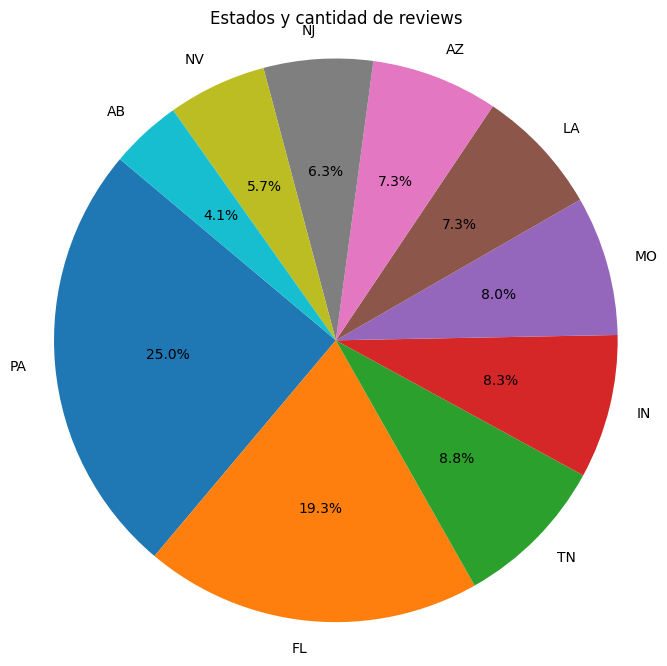

In [12]:
## aca lo mismo pero en grafico de barras
plt.figure(figsize=(8, 8))
plt.pie(estados_sorted10['business_id'], labels=estados_sorted10.index, autopct='%1.1f%%', startangle=140)
plt.title('Estados y cantidad de reviews')
plt.axis('equal') 

In [13]:
# Arreglo los nan de state
df_businesses.state.isnull().sum()
df_businesses[df_businesses.state.isnull()]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."


In [14]:
df_businesses.loc[df_businesses['city'] == 'Santa Barbara', 'state'] = 'CA'
df_businesses.loc[df_businesses['city'] == 'Affton', 'state'] = 'MO'
df_businesses.loc[df_businesses['city'] == 'Tucson', 'state'] = 'AZ'


In [51]:
df_businesses.state.isnull().sum()

0

In [52]:
### sera real tantos nulos??? o es por la forma de subirlo que hay algun error??????
df_businesses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150346 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
dtypes: object(14)
memory usage: 17.2+ MB


In [15]:
df_businesses_florida = df_businesses[df_businesses["state"]=="FL"]
filtro = df_businesses_florida['categories'].astype(str).str.contains('restaurant', case=False, na=False)
df_filtrado = df_businesses_florida[filtro]

In [16]:
df_filtrado.shape

(8618, 14)

In [17]:
df_filtrado.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'..."
53,cVBxfMC4lp3DnocjYA3FHQ,Paws The Cat Cafe,10588 109 Street,Edmonton,FL,T5H 3B2,53.549633,-113.50878,5.0,20,0,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Coffee & Tea, Cafes, Pets, Restaurants, Pet Ad...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-21:0', ..."
61,seKihQKpGGnCeLuELRQPSQ,Twin Peaks,6880 E 82nd St,Indianapolis,FL,46250,39.906295,-86.047463,3.5,257,1,"{'CoatCheck': 'False', 'Music': '{'dj': False}...","Sports Bars, American (New), American (Traditi...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-0:0', '..."
62,L_TT0BFmFwORAMaA83K54A,Village Tap Room,838 Broad Ripple Ave,Indianapolis,FL,46220,39.869911,-86.143577,2.5,23,0,"{'Alcohol': 'u'none'', 'BestNights': '{'monday...","Gastropubs, Cocktail Bars, Beer Bar, Bars, Res...",None
82,ppFCk9aQkM338Rgwpl2F5A,Wawa,3604 Chestnut St,Philadelphia,FL,19104,39.954573,-75.194894,3.0,56,1,"{'Alcohol': 'u'none'', 'RestaurantsGoodForGrou...","Restaurants, Automotive, Delis, Gas Stations, ...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


In [18]:
df_filtrado.city.unique()

array(['Largo', 'Edmonton', 'Indianapolis', 'Philadelphia', 'New Orleans',
       'Saint Petersburg', 'Tampa', 'Harvey', 'Warrington', 'Langhorne',
       'Franklin', 'Hermitage', 'Bala Cynwyd', 'Odessa', 'Horsham',
       'Brandon', 'Narberth', 'Haddonfield', 'Haddon Heights',
       'Noblesville', 'Cherry Hill', 'Boise', 'Nashville', 'Conshohocken',
       'Florissant', 'Goleta', 'Ruskin', 'Jennings', 'Wesley Chapel',
       'Voorhees', 'Riverside', 'Lambertville', 'St Petersburg',
       'Godfrey', 'Sparks', 'Media', 'Fort Washington', 'Wayne',
       'Saint Louis', 'Trenton', 'Lutz', 'St. Louis', 'Glen Carbon',
       'Dunedin', 'Folsom', 'Fenton', 'Eagle', 'Reno', 'Kimberton',
       'Madison', 'Dublin', 'Phoenixville', 'King of Prussia',
       'West Chester', 'St. Petersburg', 'Granite City', 'Trooper',
       'Pinellas Park', 'Marana', 'Port Richey', 'Brentwood', 'Glenside',
       'West Berlin', 'La Vergne', 'Newtown', 'Fishers', 'Meridian',
       'Ballwin', 'Carmel', 'East G

In [21]:
# Definimos los límites para Estado de Florida para filtrar el dataset por longitud y latitud
longitud_derecha = -79.881045
longitud_izquierda = -87.661455
latitud_arriba = 30.998029
latitud_abajo = 24.511264


# Filtramos el DataFrame
df_filtrado1 = df_filtrado[
    (df_filtrado['longitude'] >= longitud_izquierda) &
    (df_filtrado['longitude'] <= longitud_derecha) &
    (df_filtrado['latitude'] >= latitud_abajo) &
    (df_filtrado['latitude'] <= latitud_arriba)]


# Ahora, df_filtrado contiene solo las filas dentro de los límites especificados

In [30]:
df_filtrado1.city.unique()

array(['Largo', 'Saint Petersburg', 'Tampa', 'Odessa', 'Brandon',
       'Ruskin', 'Wesley Chapel', 'St Petersburg', 'Lutz', 'Dunedin',
       'St. Petersburg', 'Pinellas Park', 'Port Richey', 'Apollo Beach',
       'New Port Richey', 'Clearwater', 'Oldsmar', 'Plant City',
       'Wimauma', 'Palm Harbor', 'Zephyrhills', 'Valrico', 'Spring Hill',
       'Tampa Bay', 'Clearwater Beach', 'Indian Rocks Beach', 'Sun City',
       'Temple Terrace', 'Hudson', 'Seminole', 'Dover', 'Tarpon Springs',
       "Land O' Lakes", 'Seffner', 'Saint Pete Beach', 'Carrollwood',
       'Belleair Bluffs', 'Riverview', 'Safety Harbor', 'Holiday',
       'Pinecrest West Park', 'Gulfport', 'Madeira Beach', 'Ozona',
       'South Pasadena', 'Treasure Island', 'Lithia', 'St Pete',
       'St. Pete Beach', 'Trinity', 'Indian Shores', 'Tierra Verde',
       'Thonotosassa', 'San Antonio', 'Bayonet Point', 'Masaryktown',
       'TAMPA', 'St Pete Beach', 'Sun City Center', 'HUdson',
       'Land O Lakes', 'Kenneth C

In [33]:
# Creando un mapa centrado en una coordenada media
m = folium.Map(location=[df_filtrado1['latitude'].mean(), df_filtrado1['longitude'].mean()], zoom_start=7, tiles='Stamen Terrain')


# Agrupando y contando las coordenadas repetidas
df_grouped = df_filtrado1.groupby(['latitude', 'longitude']).size().reset_index(name='count')

# Añadiendo los puntos al mapa
for idx, row in df_grouped.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),

        fill=True,
        fill_color='blue'
    ).add_to(m)

#m.save('map.html')

m

# Yelp - Archivo TIP

In [39]:
df4= pd.read_json(r"C:\Users\flori\Desktop\LOCAL\YELP\Yelp\tip.json", lines=True)

In [40]:
df4.head(10)

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0
5,trf3Qcz8qvCDKXiTgjUcEg,7Rm9Ba50bw23KTA8RedZYg,"Chili Cup + Single Cheeseburger with onion, pi...",2012-03-13 04:00:52,0
6,SMGAlRjyfuYu-c-22zIyOg,kH-0iXqkL7b8UXNpguBMKg,"Saturday, Dec 7th 2013, ride Patco's Silver Sl...",2013-12-03 23:42:15,0
7,YVBB9g23nuVJ0u44zK0pSA,jtri188kuhe_AuEOJ51U_A,This is probably the best place in the cool Sp...,2016-11-22 22:14:58,0
8,VL12EhEdT4OWqGq0nIqkzw,xODBZmX4EmlVvbqtKN7YKg,Tacos,2012-07-27 01:48:24,0
9,4ay-fdVks5WMerYL_htkGQ,pICJRcyqW1cF96Q3XhLSbw,Starbucks substitute in boring downtown Tampa....,2012-06-09 22:57:04,0


# YELP -Archivo User

In [ ]:
df5.head(10)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0
5,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1221,2005-03-14 20:26:35,14953,9940,11211,"2006,2007,2008,2009,2010,2011,2012,2013,2014","xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg...",1357,...,163,191,361,147,1212,5696,2543,2543,815,323
6,cxuxXkcihfCbqt5Byrup8Q,Rob,12,2009-02-24 03:09:06,6,1,0,,"HDAQ74AEznP-YsMk1B14CA, 6A6-aIX7fg_zRy9MiE6YyQ...",1,...,0,0,0,0,0,1,0,0,0,0
7,E9kcWJdJUHuTKfQurPljwA,Mike,358,2008-12-11 22:11:56,399,102,143,,"y2GyxJF5VQWohxgw_GR7Jw, 0NRn4eY3JWN0IFqvOSa5gA...",23,...,7,2,0,0,8,6,12,12,5,0
8,lO1iq-f75hnPNZkTy3Zerg,Rachelle,40,2008-12-29 22:40:56,109,40,46,,"tOQDlz36rI__SOsbL-HCag, 83Xb0PPBwZiG2c_fLpZgAw...",7,...,0,0,3,0,3,4,5,5,3,1
9,AUi8MPWJ0mLkMfwbui27lg,John,109,2010-01-07 18:32:04,154,20,23,,"gy5fWeSv3Gamuq9Ox4MV4g, lMr3LWU6kPFLTmCpDkACxg...",4,...,0,0,0,0,1,6,3,3,0,0


In [ ]:
df5.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [ ]:
df5.shape

(2105597, 22)

In [ ]:
df5.user_id.nunique()

1987897